In [1]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats

def plot_budget(step):
    fname = directory + "/shearlayer_%04d_budget_mean_momentum.npz"%step
    data = np.load(fname)
    varnames = ['I','II','III','IV']
    for name in varnames:
        plt.plot(np.squeeze(data[name]),label=name)
    plt.legend()
    plt.xlim
    plt.show()
    
fs = 12
directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/"
filename_prefix = directory+'/shearlayer_'    
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)


Domain size: 172.0 x 257.328125 x 82.0
Grid size: 256 x 384 x 128
Grid res: 0.671875 x 0.671875 x 0.640625


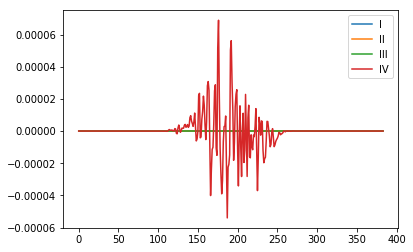

In [5]:
plot_budget(step=10)

(96, 288)

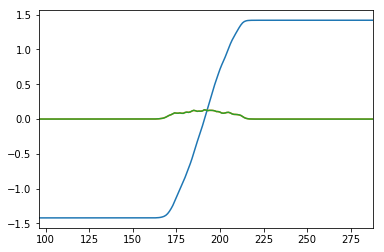

In [104]:
step=7
fname = directory + "/shearlayer_%04d_budget_mean_momentum.npz"%step
data = np.load(fname)
dat = data['ubar3D'][0,:,0]

dudy = np.zeros(Ny)
for i in range(1,Ny-2):
    dudy[i] = (dat[i+1]-dat[i-1])/2./dy

plt.plot(dat)
plt.plot(dudy)
dat = data['uy'][0,:,0]
plt.plot(dat)
plt.xlim([Ny/4,3*Ny/4])